In [1]:
import re
import os
import numpy as np
import math
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys

import gzip
import os
import re
import tarfile

from six.moves import urllib
import numpy as np
import math

from tensorflow.python.platform import gfile
import tensorflow as tf

In [2]:
pac_data_directory = "pac_data"

In [3]:
potential_sensor_directories = os.listdir(pac_data_directory)
sensor_directories = [sensor_dir for sensor_dir in potential_sensor_directories if os.path.isdir(pac_data_directory + "/" + sensor_dir)]

In [4]:
print(sensor_directories)

['02', '04', '06', '08', '10', '11', '15', '21', '22', '23', '24', '39', '52', '59', '62', '63', '72']


In [5]:
sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict = {}
sensor_directory_to_list_of_filenames_of_images_labeled_one_dict = {}
pattern = r"\d{8}_\d{6}_\d{3}.npz"
for sensor_dir in sensor_directories:
    if os.path.isdir(pac_data_directory + "/" + sensor_dir + "/0"):
        potential_filenames_of_images_labeled_with_zero = os.listdir(pac_data_directory + "/" + sensor_dir + "/0")
        filenames_of_images_labeled_with_zero = [f for f in potential_filenames_of_images_labeled_with_zero if os.path.isfile(pac_data_directory + "/" + sensor_dir + "/0/" + f) and re.match(pattern, f)]
        sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict[sensor_dir] = filenames_of_images_labeled_with_zero
    if os.path.isdir(pac_data_directory + "/" + sensor_dir + "/1"):
        potential_filenames_of_images_labeled_with_one =  os.listdir(pac_data_directory + "/" + sensor_dir + "/1")
        filenames_of_images_labeled_with_one = [f for f in potential_filenames_of_images_labeled_with_one if os.path.isfile(pac_data_directory + "/" + sensor_dir + "/1/" + f) and re.match(pattern, f)]
        sensor_directory_to_list_of_filenames_of_images_labeled_one_dict[sensor_dir] = filenames_of_images_labeled_with_one

In [6]:
sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['02'][0]

'20160930_082811_796.npz'

In [7]:
sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero = {}
sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one = {}

In [8]:
for sensor_dir in sensor_directories:
    if os.path.isdir(pac_data_directory + "/" + sensor_dir + "/0"):
        sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero[sensor_dir] = {}
        for f in sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict[sensor_dir]:
            result_of_search = re.search("(\d\d\d\d\d\d\d\d).*", f)
            year_month_day = result_of_search.group(1)
            if year_month_day in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero[sensor_dir].keys():
                sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero[sensor_dir][year_month_day].append(f)
            else:
                sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero[sensor_dir][year_month_day] = []
                sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero[sensor_dir][year_month_day].append(f)
    if os.path.isdir(pac_data_directory + "/" + sensor_dir + "/1"):
        sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one[sensor_dir] = {}
        for f in sensor_directory_to_list_of_filenames_of_images_labeled_one_dict[sensor_dir]:
            result_of_search = re.search("(\d\d\d\d\d\d\d\d).*", f)
            year_month_day = result_of_search.group(1)
            if year_month_day in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one[sensor_dir].keys():
                sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one[sensor_dir][year_month_day].append(f)
            else:
                sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one[sensor_dir][year_month_day] = []
                sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one[sensor_dir][year_month_day].append(f)

In [9]:
from datetime import datetime
sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero = {}
sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one = {}
sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict = {}
for sensor_dir in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero.keys():
    sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir] = {}
    sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir] = {}
    for year_month_day_str in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero[sensor_dir].keys():
        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][year_month_day_str] = {}
        year_month_day_res = re.search("(\d\d\d\d)(\d\d)(\d\d)", year_month_day_str)
        year = year_month_day_res.group(1)
        month = year_month_day_res.group(2)
        day = year_month_day_res.group(3)
        intervals = []
        first_interval_start = datetime(int(year), int(month), int(day), 0, 0, 0)
        first_interval_end = datetime(int(year), int(month), int(day), 4, 0, 0)
        intervals.append(("Midnight to 4:00am", first_interval_start, first_interval_end))
        second_interval_start = datetime(int(year), int(month), int(day), 4, 0, 1)
        second_interval_end = datetime(int(year), int(month), int(day), 8, 0, 0)
        intervals.append(("4:00am to 8:00am", second_interval_start, second_interval_end))
        third_interval_start = datetime(int(year), int(month), int(day), 8, 0, 1)
        third_interval_end = datetime(int(year), int(month), int(day), 12, 0, 0)
        intervals.append(("8:00am to Noon", third_interval_start, third_interval_end))
        fourth_interval_start = datetime(int(year), int(month), int(day), 12, 0, 1)
        fourth_interval_end = datetime(int(year), int(month), int(day), 16, 0, 0)
        intervals.append(("Noon to 4:00pm", fourth_interval_start, fourth_interval_end))
        fifth_interval_start = datetime(int(year), int(month), int(day), 16, 0, 1)
        fifth_interval_end = datetime(int(year), int(month), int(day), 20, 0, 0)
        intervals.append(("4:00pm to 8:00pm", fifth_interval_start, fifth_interval_end))
        sixth_interval_start = datetime(int(year), int(month), int(day), 20, 0, 1)
        sixth_interval_end = datetime(int(year), int(month), int(day), 23, 59, 59)
        intervals.append(("8:00pm to Midnight", sixth_interval_start, sixth_interval_end))
        for f in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_zero[sensor_dir][year_month_day_str]:
            hour_minute_second_res = re.search("\d\d\d\d\d\d\d\d_(\d\d)(\d\d)(\d\d).*", f)
            hour = hour_minute_second_res.group(1)
            minute = hour_minute_second_res.group(2)
            second = hour_minute_second_res.group(3)
            current_time = datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
            for current_interval in intervals:
                name, start_of_interval, end_of_interval = current_interval
                if start_of_interval <= current_time and current_time <= end_of_interval:
                    if name in sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][year_month_day_str].keys():
                        current_count = sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][year_month_day_str][name]
                        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][year_month_day_str][name] = 1 + current_count
                    else:
                        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][year_month_day_str][name] = 1
                else:
                    if not name in sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][year_month_day_str].keys():
                        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][year_month_day_str][name] = 0
                    
for sensor_dir in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one.keys():                        
    for year_month_day_str_labeled_one in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one[sensor_dir].keys():
        
        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one] = {}
        year_month_day_res = re.search("(\d\d\d\d)(\d\d)(\d\d)", year_month_day_str_labeled_one)
        year = year_month_day_res.group(1)
        month = year_month_day_res.group(2)
        day = year_month_day_res.group(3)
        intervals = []
        first_interval_start = datetime(int(year), int(month), int(day), 0, 0, 0)
        first_interval_end = datetime(int(year), int(month), int(day), 4, 0, 0)
        intervals.append(("Midnight to 4:00am", first_interval_start, first_interval_end))
        second_interval_start = datetime(int(year), int(month), int(day), 4, 0, 1)
        second_interval_end = datetime(int(year), int(month), int(day), 8, 0, 0)
        intervals.append(("4:00am to 8:00am", second_interval_start, second_interval_end))
        third_interval_start = datetime(int(year), int(month), int(day), 8, 0, 1)
        third_interval_end = datetime(int(year), int(month), int(day), 12, 0, 0)
        intervals.append(("8:00am to Noon", third_interval_start, third_interval_end))
        fourth_interval_start = datetime(int(year), int(month), int(day), 12, 0, 1)
        fourth_interval_end = datetime(int(year), int(month), int(day), 16, 0, 0)
        intervals.append(("Noon to 4:00pm", fourth_interval_start, fourth_interval_end))
        fifth_interval_start = datetime(int(year), int(month), int(day), 16, 0, 1)
        fifth_interval_end = datetime(int(year), int(month), int(day), 20, 0, 0)
        intervals.append(("4:00pm to 8:00pm", fifth_interval_start, fifth_interval_end))
        sixth_interval_start = datetime(int(year), int(month), int(day), 20, 0, 1)
        sixth_interval_end = datetime(int(year), int(month), int(day), 23, 59, 59)
        intervals.append(("8:00pm to Midnight", sixth_interval_start, sixth_interval_end))
        for f in sensor_directory_to_dictionary_of_day_to_filenames_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one]:
            hour_minute_second_res = re.search("\d\d\d\d\d\d\d\d_(\d\d)(\d\d)(\d\d).*", f)
            hour = hour_minute_second_res.group(1)
            minute = hour_minute_second_res.group(2)
            second = hour_minute_second_res.group(3)
            current_time = datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
            for current_interval in intervals:
                name, start_of_interval, end_of_interval = current_interval
                if start_of_interval <= current_time and current_time <= end_of_interval:
                    if name in sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one].keys():
                        current_count = sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one][name]
                        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one][name] = 1 + current_count
                    else:
                        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one][name] = 1
                else:
                    if not name in sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one].keys():
                        sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][year_month_day_str_labeled_one][name] = 0

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import re
from os.path import isfile



for sensor_dir in sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero.keys():
    for day in sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir].keys():
        name_of_intervals = []
        name_of_intervals.append("Midnight-4am")
        name_of_intervals.append("4am-8am")
        name_of_intervals.append("8am-Noon")
        name_of_intervals.append("Noon-4pm")
        name_of_intervals.append("4pm-8pm")
        name_of_intervals.append("8pm-Midnight")
        counts_of_intervals_labeled_zero = []
        counts_of_intervals_labeled_one = []
        counts_of_intervals_labeled_zero.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][day]["Midnight to 4:00am"])
        counts_of_intervals_labeled_zero.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][day]["4:00am to 8:00am"])
        counts_of_intervals_labeled_zero.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][day]["8:00am to Noon"])
        counts_of_intervals_labeled_zero.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][day]["Noon to 4:00pm"])
        counts_of_intervals_labeled_zero.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][day]["4:00pm to 8:00pm"])
        counts_of_intervals_labeled_zero.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_zero[sensor_dir][day]["8:00pm to Midnight"])
        if day in sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir].keys():
            counts_of_intervals_labeled_one.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][day]["Midnight to 4:00am"])
            counts_of_intervals_labeled_one.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][day]["4:00am to 8:00am"])
            counts_of_intervals_labeled_one.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][day]["8:00am to Noon"])
            counts_of_intervals_labeled_one.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][day]["Noon to 4:00pm"])
            counts_of_intervals_labeled_one.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][day]["4:00pm to 8:00pm"]) 
            counts_of_intervals_labeled_one.append(sensor_directory_to_dictionary_of_day_to_dictionary_of_time_interval_to_counts_dict_labeled_one[sensor_dir][day]["8:00pm to Midnight"])
        else:
            counts_of_intervals_labeled_one.append(0)
            counts_of_intervals_labeled_one.append(0)
            counts_of_intervals_labeled_one.append(0)
            counts_of_intervals_labeled_one.append(0)
            counts_of_intervals_labeled_one.append(0)
            counts_of_intervals_labeled_one.append(0)
        
        ind = np.arange(len(name_of_intervals))
        width = 0.27
        fig = plt.figure()
        ax = fig.add_subplot(111)
        rects1 = ax.bar(ind, counts_of_intervals_labeled_zero, width, color = 'r')
        rects2 = ax.bar(ind+width*2, counts_of_intervals_labeled_one, width, color='g')
        ax.set_ylabel('Counts')
        ax.set_xticks(ind+width)
        ax.set_xticklabels(("Midnight-4am", "4am-8am", "8am-Noon", "Noon-4pm", "4pm-8pm", "8pm-Midnight"))
        ax.legend((rects1[0], rects2[0]), ('0', '1'))
        def autolabel(rects):
            for rect in rects:
                h = rect.get_height()
                ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h), ha='center', va='bottom')
        autolabel(rects1)
        autolabel(rects2)
        plt.savefig(sensor_dir + "_" + day)
        plt.close()
        

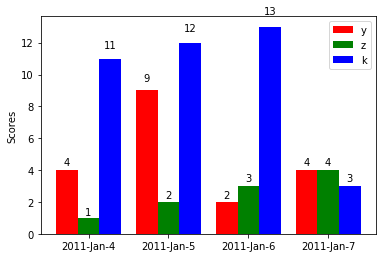

In [72]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2, 4]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1,2,3,4]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [11,12,13, 3]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6', '2011-Jan-7'))
ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()